In [81]:
import quandl, math
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [82]:
import csv
style.use('ggplot')

In [87]:
with open('/Users/ivantimohin/Desktop/WaveMaker/moscow_flu.csv', encoding='utf-8-sig') as csvfile:
    readCSV = csv.reader(csvfile, delimiter =';')
    
    dates = []
    week_numbers = []
    absolutes = []
    epidemy_indexes = []
    epidemy_week = [[],[],[]]
    epidemy_list = []
    
    
    for row in readCSV:
        date = row[9]
        week_num = row[0]
        absolute = row[3]
        epidemy_index = row[4]
        epidemy_week = [week_num, absolute, epidemy_index]
        
        
        dates.append(date)
        week_numbers.append(week_num)
        absolutes.append(absolute)
        epidemy_indexes.append(epidemy_index)
        epidemy_list.append(epidemy_week)
    
    dates_for_indexes = pd.to_datetime(dates, dayfirst = True)
    labels = ['Week', 'Absolute', 'Epidemy_Index']
    df = pd.DataFrame.from_records(epidemy_list, index = dates_for_indexes, columns=labels)
 
    
forecast_col = 'Epidemy_Index'
df.fillna(-9999, inplace=True)
forecast_out = int(math.ceil(0.02*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)



X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

print(df)

df.dropna(inplace=True)


y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

           Week Absolute Epidemy_Index label
2017-01-01    1    98616            82    60
2017-01-08    2    47835            40    58
2017-01-15    3    72773            60    64
2017-01-22    4    69246            58    69
2017-01-29    5    76988            64    75
2017-02-05    6    82907            69    72
2017-02-12    7    90719            75    72
2017-02-19    8    86469            72    52
2017-02-19    9    86469            72    58
2017-02-26   10    63166            52    45
2017-03-05   11    69594            58    50
2017-03-12   12    54234            45    51
2017-03-19   13    59946            50    48
2017-03-26   14    61057            51    44
2017-04-02   15    58105            48    40
2017-04-09   16    53442            44    41
2017-04-16   17    47629            40    36
2017-04-23   18    49299            41    29
2017-04-30   19    43639            36    26
2017-05-07   20    35024            29    28
2017-05-14   21    31262            26    25
2017-05-21

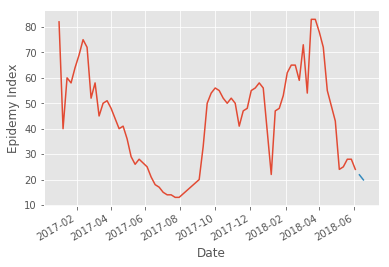

In [88]:
df = df.astype(float)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_week = 86400*7
next_unix = last_unix + one_week

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400*7
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


df['Epidemy_Index'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Epidemy Index')
plt.show()

In [85]:
print(df)

                     Week  Absolute  Epidemy_Index  label   Forecast
2017-01-01 00:00:00   1.0   98616.0           82.0   60.0        NaN
2017-01-08 00:00:00   2.0   47835.0           40.0   58.0        NaN
2017-01-15 00:00:00   3.0   72773.0           60.0   64.0        NaN
2017-01-22 00:00:00   4.0   69246.0           58.0   69.0        NaN
2017-01-29 00:00:00   5.0   76988.0           64.0   75.0        NaN
2017-02-05 00:00:00   6.0   82907.0           69.0   72.0        NaN
2017-02-12 00:00:00   7.0   90719.0           75.0   72.0        NaN
2017-02-19 00:00:00   8.0   86469.0           72.0   52.0        NaN
2017-02-19 00:00:00   9.0   86469.0           72.0   58.0        NaN
2017-02-26 00:00:00  10.0   63166.0           52.0   45.0        NaN
2017-03-05 00:00:00  11.0   69594.0           58.0   50.0        NaN
2017-03-12 00:00:00  12.0   54234.0           45.0   51.0        NaN
2017-03-19 00:00:00  13.0   59946.0           50.0   48.0        NaN
2017-03-26 00:00:00  14.0   61057.